In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy import stats

### Exercise 1

Let $X_1,\dots,X_n$ be an i.i.d. sample from $\mathcal N(0.1,\sigma^2)$.

Consider testing $H_0: \mathbb E[X_1]=0$, with t-test.

- Let $n = 30,31,\dots,300$ and $\sigma=0.4$. Plot the p-value of the t-test vs. $n$.
- Let $n = 30$ and $\sigma = 0.01,0.02,\dots,1$. Plot the p-value of the t-test vs. $\sigma$.
- Add labels to the plot axis.
- What do you observe?

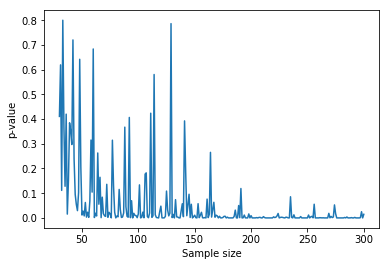

In [3]:
ngrid = range(30, 301)
pvalues = []
for n in ngrid:
    data = np.random.normal(0.1, 0.4, n)
    pvalues.append(stats.ttest_1samp(data, 0).pvalue)

plt.plot(ngrid, pvalues)
plt.xlabel('Sample size')
plt.ylabel('p-value')
plt.show()

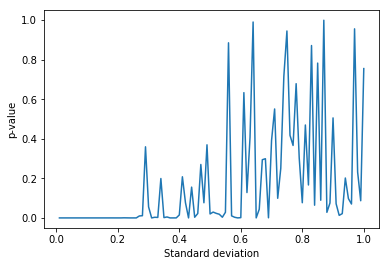

In [6]:
sigmagrid = np.arange(0.01, 1.01, 0.01)
pvalues = []
for sigma in sigmagrid:
    data = np.random.normal(0.1, sigma, 100)
    pvalues.append(stats.ttest_1samp(data, 0).pvalue)

plt.plot(sigmagrid, pvalues)
plt.xlabel('Standard deviation')
plt.ylabel('p-value')
plt.show()

The null hypothesis is actually false because $\mathbb E[X_1] = 0.1 \neq 0$ in the generated data sample.

The p-value tends to decrease with the data sample size ($H_0$ is more rejected) and increase with $\sigma$ ($H_0$ is less rejected).

### Exercise 2

Let $X_1,\dots,X_n$ be an i.i.d. sample from $\mathcal B(1,0.5)$ (Bernoulli distribution).

For all $i \in \{1,\dots,n\}$, let $Y_i \sim \mathcal N(-1,1)$ if $X_i=0$ and $Y_i \sim \mathcal N(1,1)$ if $X_i=1$.

For all $i \in \{1,\dots,n\}$, let $Z_i=0$ if $Y_i<0$ and $Z_i=1$ if $Y_i\geq0$.

Consider testing $H_0$: $X_1$ and $Z_1$ are independent, with the $\chi^2$ test of independence.

Let $n = 3,4,\dots,60$. 

- Plot the p-value of the $\chi^2$ test vs. $n$.
- Plot the $\chi^2$ test statistic vs. $n$.
- Add labels to the plot axis.
- What do you observe?

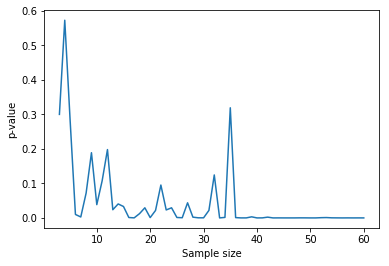

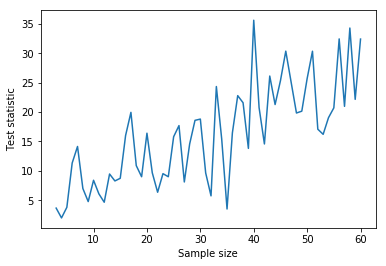

In [7]:
ngrid = range(3, 61)
pvalues = []
statvalues = []
for n in ngrid:
    xdata = np.random.binomial(1, 0.5, n)
    ydata = np.array([np.random.normal(1, 1, 1)[0] if x else np.random.normal(-1, 1, 1)[0] for x in xdata])
    zdata = np.array([1 if y >= 0 else 0 for y in ydata])
    freqs = [sum(np.logical_and(xdata==0, zdata==0)),
            sum(np.logical_and(xdata==0, zdata==1)),
            sum(np.logical_and(xdata==1, zdata==0)),
            sum(np.logical_and(xdata==1, zdata==1))]
    pvalues.append(stats.chisquare(freqs).pvalue)
    statvalues.append(stats.chisquare(freqs).statistic)
    
plt.plot(ngrid, pvalues)
plt.xlabel('Sample size')
plt.ylabel('p-value')
plt.show()

plt.plot(ngrid, statvalues)
plt.xlabel('Sample size')
plt.ylabel('Test statistic')
plt.show()

The null hypothesis is actually false because $Z_1$ depends on $X_1$ in the generated data samples.

The p-value tends to decrease and the test statistic tends to increase with the data sample size ($H_0$ is more rejected).

### Exercise 3

Let $X_{11},\dots,X_{n1}$ be an i.i.d. sample from $\mathcal N(5,2)$.

Let $X_{12},\dots,X_{n2}$ be an i.i.d. sample from $\mathcal U([0,10])$.

Let $\varepsilon_1,\dots,\varepsilon_n$ be an i.i.d. sample from $\mathcal N(0,1)$.

For all $i \in \{1,\dots,n\}$, let $Y_i = a + b X_{i1} + c X_{i2} + \varepsilon_i$ where $a=2$, $b=3$, $c=1$.

Suppose that we observe $Y_1,\dots,Y_n$ and $(X_{11},X_{12}),\dots,(X_{n1},X_{n2})$ and that we do not know the true value of $a$, $b$ and $c$.

**In this exercise the use of native functions from NumPy or SciPy for least squares estimation is not allowed. You must use matrix calculus only.**

- Let $n=200$. Generate these data samples.
- Estimate the regression coefficients by least squares estimation.

In [8]:
n = 200

ones = np.array([1] * n)
x1data = np.random.normal(5, np.sqrt(2), n)
x2data = np.random.uniform(0, 10, n)
eps = np.random.normal(0, 1, n)

a = 2
b = 3
c = 1

ydata = a * ones + b * x1data + c * x2data + eps

Xdata = np.column_stack((ones, x1data, x2data))

coef_est = np.linalg.inv(Xdata.T.dot(Xdata)).dot(Xdata.T).dot(ydata)

print(coef_est)

[ 1.87641384  2.99727154  1.03103882]


### Exercise 4

Consider the same linear regression model as in Exercise 3.

- Let $n = 3,4,\dots,300$. Plot the values of the estimated coefficients vs. $n$.
- Add labels to the plot axis.
- What do you observe?

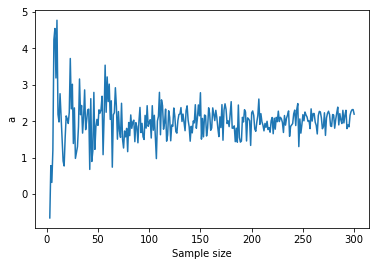

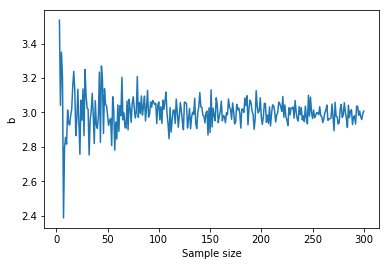

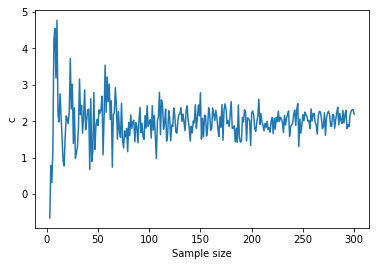

In [9]:
ngrid = range(3, 301)
avalues = []
bvalues = []
cvalues = []
for n in ngrid:
    ones = np.array([1] * n)
    x1data = np.random.normal(5, np.sqrt(2), n)
    x2data = np.random.uniform(0, 10, n)
    eps = np.random.normal(0, 1, n)
    ydata = a * ones + b * x1data + c * x2data + eps
    Xdata = np.column_stack((ones, x1data, x2data))
    coef_est = np.linalg.inv(Xdata.T.dot(Xdata)).dot(Xdata.T).dot(ydata)
    avalues.append(coef_est[0])
    bvalues.append(coef_est[1])
    cvalues.append(coef_est[2])
    
plt.plot(ngrid, avalues)
plt.xlabel('Sample size')
plt.ylabel('a')
plt.show()

plt.plot(ngrid, bvalues)
plt.xlabel('Sample size')
plt.ylabel('b')
plt.show()

plt.plot(ngrid, avalues)
plt.xlabel('Sample size')
plt.ylabel('c')
plt.show()

The least squares estimators of the regression coefficients converge to the true values as the data sample size increases.